## ITCS/SE494 Machine Learning
## Lab 5. Convolutional Neural Networks

## Step 1: Import Libraries

We start by loading the needed libraries. Install any missing ones using pip3 or conda.

In [14]:
pip install opencv-python

In [1]:
import os
os.sys.path

['C:\\Users\\Hakeem\\Machine Learning\\Calligraphy Dataset',
 'C:\\Users\\Hakeem\\anaconda3\\python38.zip',
 'C:\\Users\\Hakeem\\anaconda3\\DLLs',
 'C:\\Users\\Hakeem\\anaconda3\\lib',
 'C:\\Users\\Hakeem\\anaconda3',
 '',
 'C:\\Users\\Hakeem\\anaconda3\\lib\\site-packages',
 'C:\\Users\\Hakeem\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\Hakeem\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Hakeem\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Hakeem\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Hakeem\\.ipython']

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

import sklearn.metrics
from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import os
import cv2

import numpy as np

## Step 2: Loading the Data

Next, we load the data from the current folder. The list "labels" contains the names of the subforlders for each class of calligraphy style.


In [3]:
labels = ['Naskh', 'Ruqaah','Thuluth'] # These are the folder names

img_size = 224

def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img),0) #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
              #  img_arr = cv2.imread(os.path.join(path, img),-1) #convert BGR to RGB format
              #  data.append([img_arr, class_num]) # Use this if you do not want to reshape images
            except Exception as e:
                print(e)
    return np.array(data)

## Step 3: Visualize and Examine the Data

In [4]:
images = get_data('.')

OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



<ipython-input-3-52ba8c9e8ac3>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


C:\Users\Hakeem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

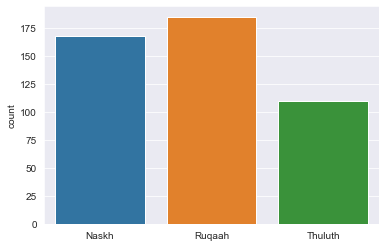

In [5]:
l = []
for i in images:
    if(i[1] == 0):
        l.append("Naskh")
    elif(i[1] == 1):
        l.append("Ruqaah")
    else:
        l.append("Thuluth")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'Naskh')

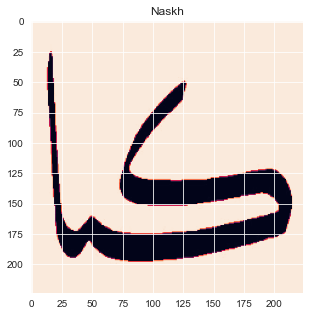

In [6]:
plt.figure(figsize = (5,5))
plt.imshow(images[2][0])
plt.title(labels[images[1][1]])

Notice that the change in image size also changes the proportions of the calligraphy. Does keeping the same shapes improve the results?

## Step 4: Preprocessing and split dataset into train and test

In [7]:
from sklearn.model_selection import train_test_split

data, labels = np.arange(10).reshape((5, 2)), range(5)

data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.20, random_state=42)

In [8]:
x = []
y = []

for feature, label in images:
  x.append(feature)
  y.append(label)

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=4, stratify=y)

In [10]:
print(len(x_train))
print(len(x_test))

310
153


Will adding more data improve the model's accuracy and F1 scores?

## Step 6: Normalize the Data

In [11]:
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

In [12]:
x_train = x_train.reshape(-1, img_size, img_size, 1)
x_test = x_test.reshape(-1, img_size, img_size, 1)

In [13]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [14]:
print(len(x_train))
print(len(x_test))

310
153


In [15]:
x_train.shape

(310, 224, 224, 1)

## Define Model

In [15]:
def build_model(var_activation='relu',var_optimizer='adam'):
    model=Sequential()
    model.add(Conv2D(32,3,padding="same", activation=var_activation, input_shape=(224,224,1)))
    model.add(MaxPool2D())

    model.add(Conv2D(32, 3, padding="same", activation=var_activation))
    model.add(MaxPool2D())

    model.add(Conv2D(64, 3, padding="same", activation=var_activation))
    model.add(MaxPool2D())
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(128,activation=var_activation))
    model.add(Dense(3, activation="softmax"))
    #opt = Adam(lr=0.000001)
    model.compile(optimizer = var_optimizer , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])
    model.summary()
    return model

In [16]:
model=build_model()
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0

In [17]:
history = model.fit(x_train,y_train, epochs = 100 , validation_data = (x_test, y_test))


Epoch 1/100
10/10 [==============================] - 13s 1s/step - loss: 1.1136 - accuracy: 0.2979 - val_loss: 1.1023 - val_accuracy: 0.3660
Epoch 2/100
10/10 [==============================] - 12s 1s/step - loss: 1.1072 - accuracy: 0.3217 - val_loss: 1.0935 - val_accuracy: 0.3791
Epoch 3/100
10/10 [==============================] - 12s 1s/step - loss: 1.1009 - accuracy: 0.3651 - val_loss: 1.0868 - val_accuracy: 0.4248
Epoch 4/100
10/10 [==============================] - 12s 1s/step - loss: 1.0898 - accuracy: 0.3834 - val_loss: 1.0801 - val_accuracy: 0.5033
Epoch 5/100
10/10 [==============================] - 12s 1s/step - loss: 1.0711 - accuracy: 0.4841 - val_loss: 1.0743 - val_accuracy: 0.4510
Epoch 6/100
10/10 [==============================] - 12s 1s/step - loss: 1.0758 - accuracy: 0.4257 - val_loss: 1.0702 - val_accuracy: 0.4118
Epoch 7/100
10/10 [==============================] - 12s 1s/step - loss: 1.0780 - accuracy: 0.4141 - val_loss: 1.0670 - val_accuracy: 0.4118
Epoch 8/100
1

Epoch 59/100
10/10 [==============================] - 12s 1s/step - loss: 0.9345 - accuracy: 0.6282 - val_loss: 0.9279 - val_accuracy: 0.6471
Epoch 60/100
10/10 [==============================] - 12s 1s/step - loss: 0.9301 - accuracy: 0.6382 - val_loss: 0.9241 - val_accuracy: 0.6601
Epoch 61/100
10/10 [==============================] - 12s 1s/step - loss: 0.9166 - accuracy: 0.6522 - val_loss: 0.9207 - val_accuracy: 0.6601
Epoch 62/100
10/10 [==============================] - 12s 1s/step - loss: 0.9112 - accuracy: 0.6915 - val_loss: 0.9174 - val_accuracy: 0.6601
Epoch 63/100
10/10 [==============================] - 12s 1s/step - loss: 0.9209 - accuracy: 0.6672 - val_loss: 0.9139 - val_accuracy: 0.6797
Epoch 64/100
10/10 [==============================] - 12s 1s/step - loss: 0.9045 - accuracy: 0.6560 - val_loss: 0.9108 - val_accuracy: 0.6601
Epoch 65/100
10/10 [==============================] - 12s 1s/step - loss: 0.9128 - accuracy: 0.6715 - val_loss: 0.9075 - val_accuracy: 0.6601
Epoch 

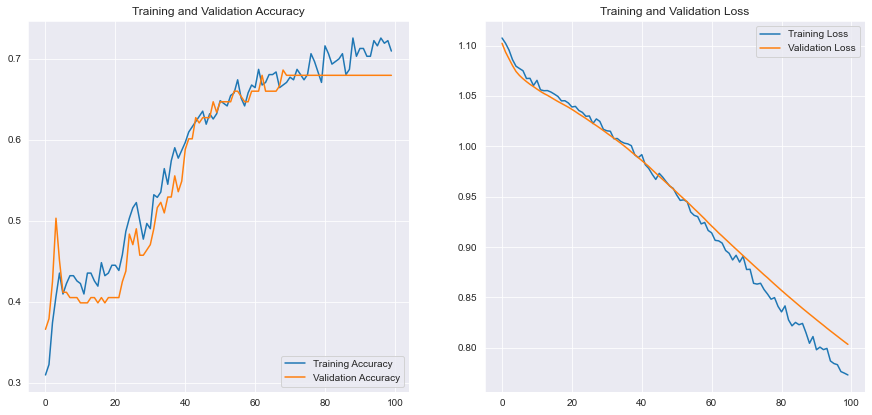

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Result

In [19]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_test, predictions, target_names = ['Naskh (Class 0)','Ruqaah (Class 1)','Thuluth (Class 2)']))
print(sklearn.metrics.f1_score(y_test, predictions, average=None))

C:\Users\Hakeem\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


                   precision    recall  f1-score   support

  Naskh (Class 0)       0.64      0.80      0.71        56
 Ruqaah (Class 1)       0.71      0.97      0.82        61
Thuluth (Class 2)       0.00      0.00      0.00        36

         accuracy                           0.68       153
        macro avg       0.45      0.59      0.51       153
     weighted avg       0.52      0.68      0.59       153

[0.71428571 0.81944444 0.        ]


C:\Users\Hakeem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
predictions = model.predict_classes(x_test)
print(predictions)

[1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1
 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0
 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1
 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1
 1 0 0 0 1]


In [61]:

pred_name = labels[np.argmax(predictions)]
print(pred_name)

0


# non of the predictions gave the value if thulth (class2)

## Problem 

The following are the tasks for this lab. Please document your answers in the Jupyter Notebook and submit it online:

1) Test the generated model on external samples of calligraphy from the three styles and verify that the model is working. (2 points)

2) Calculate the F1 results properly. (1 points)

3) Try to improve the results (5 points) by trying any or all of the following:

<ol>
<li>Tuning the hyperparameters </li>
<li>Change the architecture</li>
<li>Adding training data</li>
</ol>
 

4) Think about using data augmentation to improve results. (2 points)


# f1 for thuluth class is zero because the model did not predict any input for class 2 a reason could be because it have the least number of testing data

In [142]:
my=[]
img_size = 224
labels=['ntest','rtest','ttest']
def get_tdata(data_dir):
    data = [] 
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            if(label=='ntest'):
                my.append(0)
            elif(label=='rtest'):
                my.append(1)
            else:
                my.append(2)
            try:
                img_arr = cv2.imread(os.path.join(path, img),0) #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
              #  img_arr = cv2.imread(os.path.join(path, img),-1) #convert BGR to RGB format
              #  data.append([img_arr, class_num]) # Use this if you do not want to reshape images
            except Exception as e:
                print(e)
    return np.array(data)

In [143]:
mImgs=get_tdata('.');

<ipython-input-142-f00fbcbffa55>:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


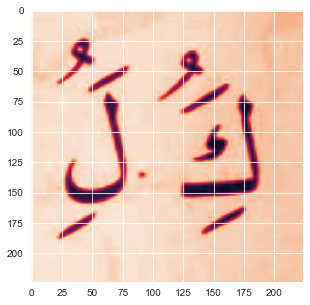

In [144]:
plt.figure(figsize = (5,5))
plt.imshow(mImgs[2][0])
mx = []
for feature, label in mImgs:
  mx.append(feature)

# Predicting external Data

In [145]:
mx=np.array(mx) / 255
mx=mx.reshape(-1, img_size, img_size, 1)
predictions = model.predict_classes(mx)
print('predictions values are: ',predictions)
print('real answers: ',my)


predictions values are:  [0 1 0 0 1 1 1 0]
real answers:  [0, 0, 0, 0, 1, 1, 2, 2]


# the model biggest problrm is that it cant detect thulth fonts as we also so that non of the predictions of the testing set predicted thulth  

## tuning hyper paramenter by randomized search
the randmozed search is between actvation(tanh,relu,selu)
optmizers 'sgd' and adam

In [20]:
_activations=['tanh','relu','selu']
_optimizers=['sgd','adam']
_batch_size=[16,32,64]
params=dict(var_activation=_activations,
            var_optimizer=_optimizers,
            batch_size=_batch_size)
print(params)

{'var_activation': ['tanh', 'relu', 'selu'], 'var_optimizer': ['sgd', 'adam'], 'batch_size': [16, 32, 64]}


In [21]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

model = KerasClassifier(build_fn=build_model,epochs=10,batch_size=16)

In [22]:
np.random.seed(42)
x_train.shape,y_train.shape

((310, 224, 224, 1), (310,))

In [23]:
rscv = RandomizedSearchCV(model, param_distributions=params, cv=3,n_iter=10)
rscv_results = rscv.fit(x_train,y_train)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 32)      320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 28, 64)       

KeyboardInterrupt: 

In [77]:
print('Best score is: {} using {}'.format(rscv_results.best_score_,
rscv_results.best_params_))

Best score is: 0.7127520442008972 using {'var_optimizer': 'adam', 'var_activation': 'relu', 'batch_size': 16}


### best combination is optimizer': adam, activation: relu, batch_size: 16}

In [81]:
history = model.fit(x_train,y_train,batch_size=16, epochs = 100 , validation_data = (x_test, y_test))


Epoch 1/100
20/20 [==============================] - 13s 640ms/step - loss: 1.0887 - accuracy: 0.3968 - val_loss: 1.0823 - val_accuracy: 0.4771
Epoch 2/100
20/20 [==============================] - 13s 633ms/step - loss: 1.0826 - accuracy: 0.4097 - val_loss: 1.0758 - val_accuracy: 0.4118
Epoch 3/100
20/20 [==============================] - 12s 618ms/step - loss: 1.0752 - accuracy: 0.4258 - val_loss: 1.0712 - val_accuracy: 0.4052
Epoch 4/100
20/20 [==============================] - 13s 628ms/step - loss: 1.0711 - accuracy: 0.4290 - val_loss: 1.0677 - val_accuracy: 0.3987
Epoch 5/100
20/20 [==============================] - 13s 656ms/step - loss: 1.0697 - accuracy: 0.4032 - val_loss: 1.0646 - val_accuracy: 0.3987
Epoch 6/100
20/20 [==============================] - 14s 709ms/step - loss: 1.0664 - accuracy: 0.4194 - val_loss: 1.0620 - val_accuracy: 0.3987
Epoch 7/100
20/20 [==============================] - 13s 678ms/step - loss: 1.0675 - accuracy: 0.4129 - val_loss: 1.0596 - val_accuracy:

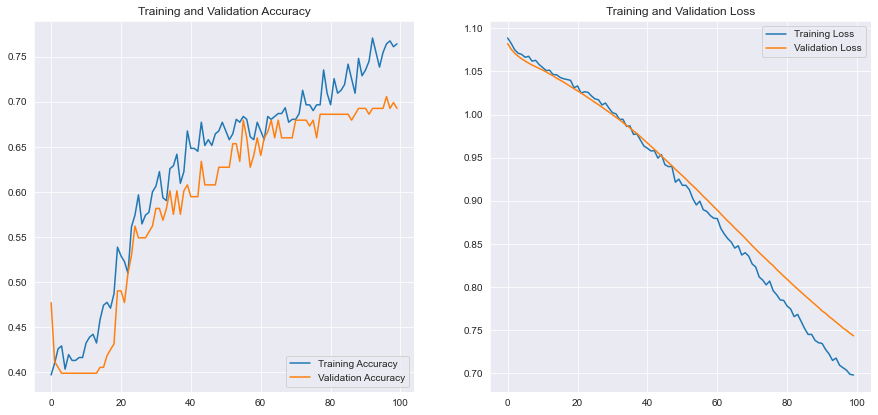

In [82]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## the traininng and valication accuracy are up approxmtaly 5% after setting the parameters according to the best score from the tuning using the randomized search this tactced worked very well as also the gap was not very big therfore not much overfitting

# next trying to cahnge the architicture of the model to two convutional before pooling


In [28]:
def build_model2(var_activation='relu',var_optimizer='adam'):
    model=Sequential()
    model.add(Conv2D(32,3,padding="same", activation=var_activation, input_shape=(224,224,1)))
    model.add(Conv2D(32,3,padding="same", activation=var_activation))
    model.add(MaxPool2D())

    model.add(Conv2D(64, 3, padding="same", activation=var_activation))
    model.add(Conv2D(64,3,padding="same", activation=var_activation))
    model.add(MaxPool2D())

    model.add(Conv2D(64, 3, padding="same", activation=var_activation))
    model.add(Conv2D(64, 3, padding="same", activation=var_activation))
    model.add(MaxPool2D())
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(128,activation=var_activation))
    model.add(Dense(3, activation="softmax"))
    opt = Adam(lr=0.000001)
    model.compile(optimizer =opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])
    model.summary()
    return model

In [29]:
history = build_model2().fit(x_train,y_train, epochs = 100 , validation_data = (x_test, y_test))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 224, 224, 32)      320       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 56, 56, 64)       

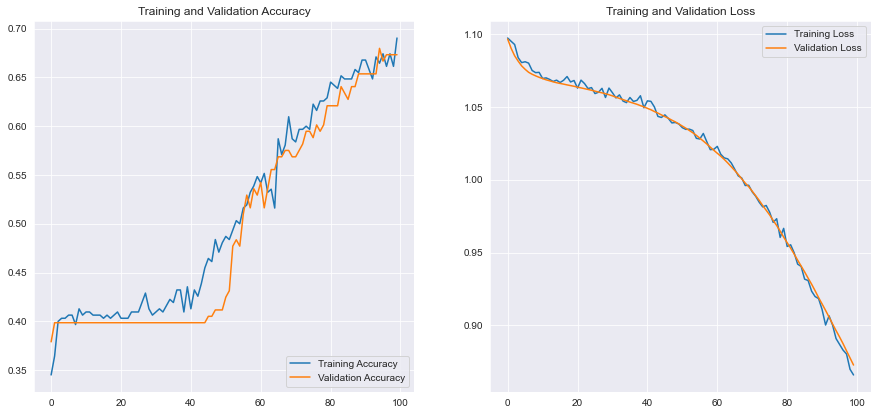

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

 ### not as much accuracy but the validation and training loss gap is very  small and is going down but did not  reach  a stable point I conclude it may need some more training timing but it took very long time more than 5 hours

# for the following architicture I added an extra hidden layer with 128 filters and 3 for kernal size

In [32]:
model=Sequential()
model.add(Conv2D(32,3,padding="same", activation='relu', input_shape=(224,224,1)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, 3, padding="same", activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(3, activation="softmax"))
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 224, 224, 32)      320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 28, 28, 128)      

In [33]:
history = model.fit(x_train,y_train, epochs = 100 , validation_data = (x_test, y_test))

Epoch 1/100
10/10 [==============================] - 14s 1s/step - loss: 1.1129 - accuracy: 0.3460 - val_loss: 1.1012 - val_accuracy: 0.3660
Epoch 2/100
10/10 [==============================] - 13s 1s/step - loss: 1.1015 - accuracy: 0.3637 - val_loss: 1.0951 - val_accuracy: 0.3660
Epoch 3/100
10/10 [==============================] - 13s 1s/step - loss: 1.0993 - accuracy: 0.3677 - val_loss: 1.0901 - val_accuracy: 0.3987
Epoch 4/100
10/10 [==============================] - 13s 1s/step - loss: 1.0934 - accuracy: 0.3914 - val_loss: 1.0858 - val_accuracy: 0.4837
Epoch 5/100
10/10 [==============================] - 13s 1s/step - loss: 1.0846 - accuracy: 0.4353 - val_loss: 1.0819 - val_accuracy: 0.5556
Epoch 6/100
10/10 [==============================] - 13s 1s/step - loss: 1.0883 - accuracy: 0.4266 - val_loss: 1.0788 - val_accuracy: 0.4248
Epoch 7/100
10/10 [==============================] - 14s 1s/step - loss: 1.0868 - accuracy: 0.3836 - val_loss: 1.0760 - val_accuracy: 0.3987
Epoch 8/100
1

Epoch 59/100
10/10 [==============================] - 18s 2s/step - loss: 1.0099 - accuracy: 0.5272 - val_loss: 1.0056 - val_accuracy: 0.4902
Epoch 60/100
10/10 [==============================] - 18s 2s/step - loss: 1.0083 - accuracy: 0.5506 - val_loss: 1.0036 - val_accuracy: 0.4967
Epoch 61/100
10/10 [==============================] - 18s 2s/step - loss: 0.9925 - accuracy: 0.6043 - val_loss: 1.0017 - val_accuracy: 0.5098
Epoch 62/100
10/10 [==============================] - 18s 2s/step - loss: 1.0054 - accuracy: 0.5841 - val_loss: 0.9998 - val_accuracy: 0.5098
Epoch 63/100
10/10 [==============================] - 18s 2s/step - loss: 1.0155 - accuracy: 0.5679 - val_loss: 0.9977 - val_accuracy: 0.5229
Epoch 64/100
10/10 [==============================] - 18s 2s/step - loss: 1.0076 - accuracy: 0.5665 - val_loss: 0.9956 - val_accuracy: 0.5229
Epoch 65/100
10/10 [==============================] - 20s 2s/step - loss: 1.0019 - accuracy: 0.6039 - val_loss: 0.9937 - val_accuracy: 0.5229
Epoch 

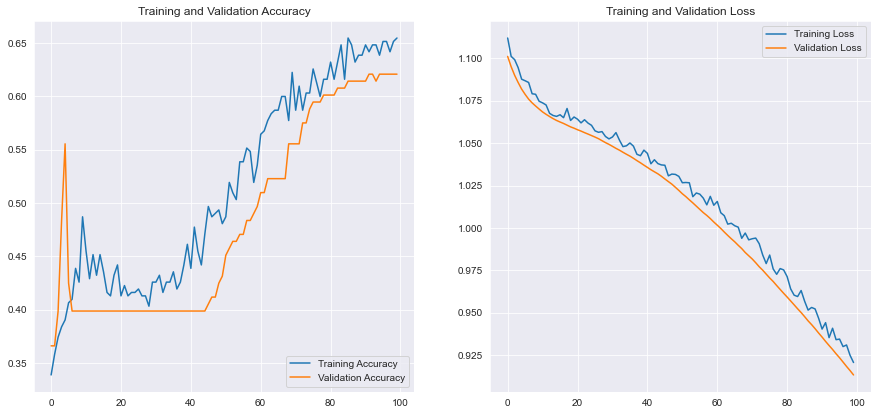

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## there is some underfitting adding the layer is worse in terms of accuracy

# Data augmentation Random rotations

### the folowwing is an example and visualizing the data augmentation

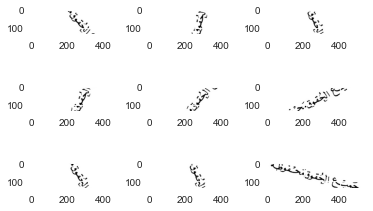

In [130]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('./Naskh/HBNaskhBW-0.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    pyplot.imshow(image)
# s
pyplot.show()# convert to numpy array


In [131]:
my=[]
img_size = 224
labels = ['Naskh', 'Ruqaah','Thuluth']
def get_tdata(data_dir):
    data = [] 
    count=0
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
           img = load_img(os.path.join(path, img))
# convert to numpy array
           dat = img_to_array(img)
           # expand dimension to one sample
           samples = expand_dims(dat, 0)
           datagen = ImageDataGenerator(rotation_range=90)
           it = datagen.flow(samples, batch_size=1)
           for i in range(9):
               
               batch = it.next()
               image = batch[0].astype('uint8')
               data.append([image, class_num])
           # show the figure
    return np.array(data)

In [129]:
images = get_tdata('.')

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000001EDF2B6E6D0>

# there is a file in the folders that cannot be identfied i tested this method on another file and it worked I would continue with the augmented data in the same process of before but the only difference would be the data size i tried bu could not solve the problem the nex cel is trial on another pictures folder and it worked

In [132]:
my=[]
img_size = 224
labels = ['ntest']
def get_tdata(data_dir):
    data = [] 
    count=0
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
           img = load_img(os.path.join(path, img))
# convert to numpy array
           dat = img_to_array(img)
           # expand dimension to one sample
           samples = expand_dims(dat, 0)
           datagen = ImageDataGenerator(rotation_range=90)
           it = datagen.flow(samples, batch_size=1)
           for i in range(9):
               
               batch = it.next()
               image = batch[0].astype('uint8')
               data.append([image, class_num])
           # show the figure
    return np.array(data)

In [133]:
get_tdata('.')

<ipython-input-132-4a1cf7fd227b>:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


array([[array([[[243, 243, 243],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [243, 243, 243],
        [243, 243, 243],
        [243, 243, 243]],

       [[243, 243, 243],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [243, 243, 243],
        [243, 243, 243],
        [243, 243, 243]],

       [[243, 243, 243],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [243, 243, 243],
        [243, 243, 243],
        [243, 243, 243]],

       ...,

       [[243, 243, 243],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [243, 243, 243],
        [243, 243, 243],
        [243, 243, 243]],

       [[243, 243, 243],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [243, 243, 243],
        [243, 243, 243],
        [243, 243, 243]],

       [[243, 243, 243],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [243, 243, 243],
        [243, 243, 243],
        [243, 24